
Install and import the required libraries

In [ ]:
# install pandas profiling library
!pip uninstall -y pandas-profiling --quiet
!pip install -U pandas-profiling --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 662.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.9 MB/s eta 0:00:00


In [ ]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset





In [ ]:
# load the dataset

df = pd.read_csv("/content/ai4i2020.csv")

In [ ]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 10000, Number of columns: 14


In [ ]:
df.head(3)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0


Data Preparation

Exploratory data analysis

In [ ]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [ ]:
# drop UDI and Product ID columns
df.drop(['Product ID', 'UDI'], axis=1, inplace = True)

In [ ]:
df.head(2)

Type  Air temperature  Process temperature  Rotational speed  Torque  \
0    M            298.1                308.6              1551    42.8   
1    L            298.2                308.7              1408    46.3   

   Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
0          0                0    0    0    0    0    0  
1          3                0    0    0    0    0    0

In [ ]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  int64  
 6   Machine failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [ ]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

count        mean         std     min     25%     50%  \
Air temperature      10000.0   300.00493    2.000259   295.3   298.3   300.1   
Process temperature  10000.0   310.00556    1.483734   305.7   308.8   310.1   
Rotational speed     10000.0  1538.77610  179.284096  1168.0  1423.0  1503.0   
Torque               10000.0    39.98691    9.968934     3.8    33.2    40.1   
Tool wear            10000.0   107.95100   63.654147     0.0    53.0   108.0   
Machine failure      10000.0     0.03390    0.180981     0.0     0.0     0.0   
TWF                  10000.0     0.00460    0.067671     0.0     0.0     0.0   
HDF                  10000.0     0.01150    0.106625     0.0     0.0     0.0   
PWF                  10000.0     0.00950    0.097009     0.0     0.0     0.0   
OSF                  10000.0     0.00980    0.098514     0.0     0.0     0.0   
RNF                  10000.0     0.00190    0.043550     0.0     0.0     0.0   

                        75%     max  
Air temperature       301.5   304.5  
Process temperature   311.1   313.8  
Rotational speed     1612.0  2886.0  
Torque                 46.8    76.6  
Tool wear             162.0   253.0  
Machine failure         0.0     1.0  
TWF                     0.0     1.0  
HDF                     0.0     1.0  
PWF                     0.0     1.0  
OSF                     0.0     1.0  
RNF                     0.0     1.0

In [ ]:
# overall descriptive information on categorical attributes
df_categorical = df.select_dtypes(include=[np.object_])
df_categorical.describe().transpose()

count unique top  freq
Type  10000      3   L  6000

Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


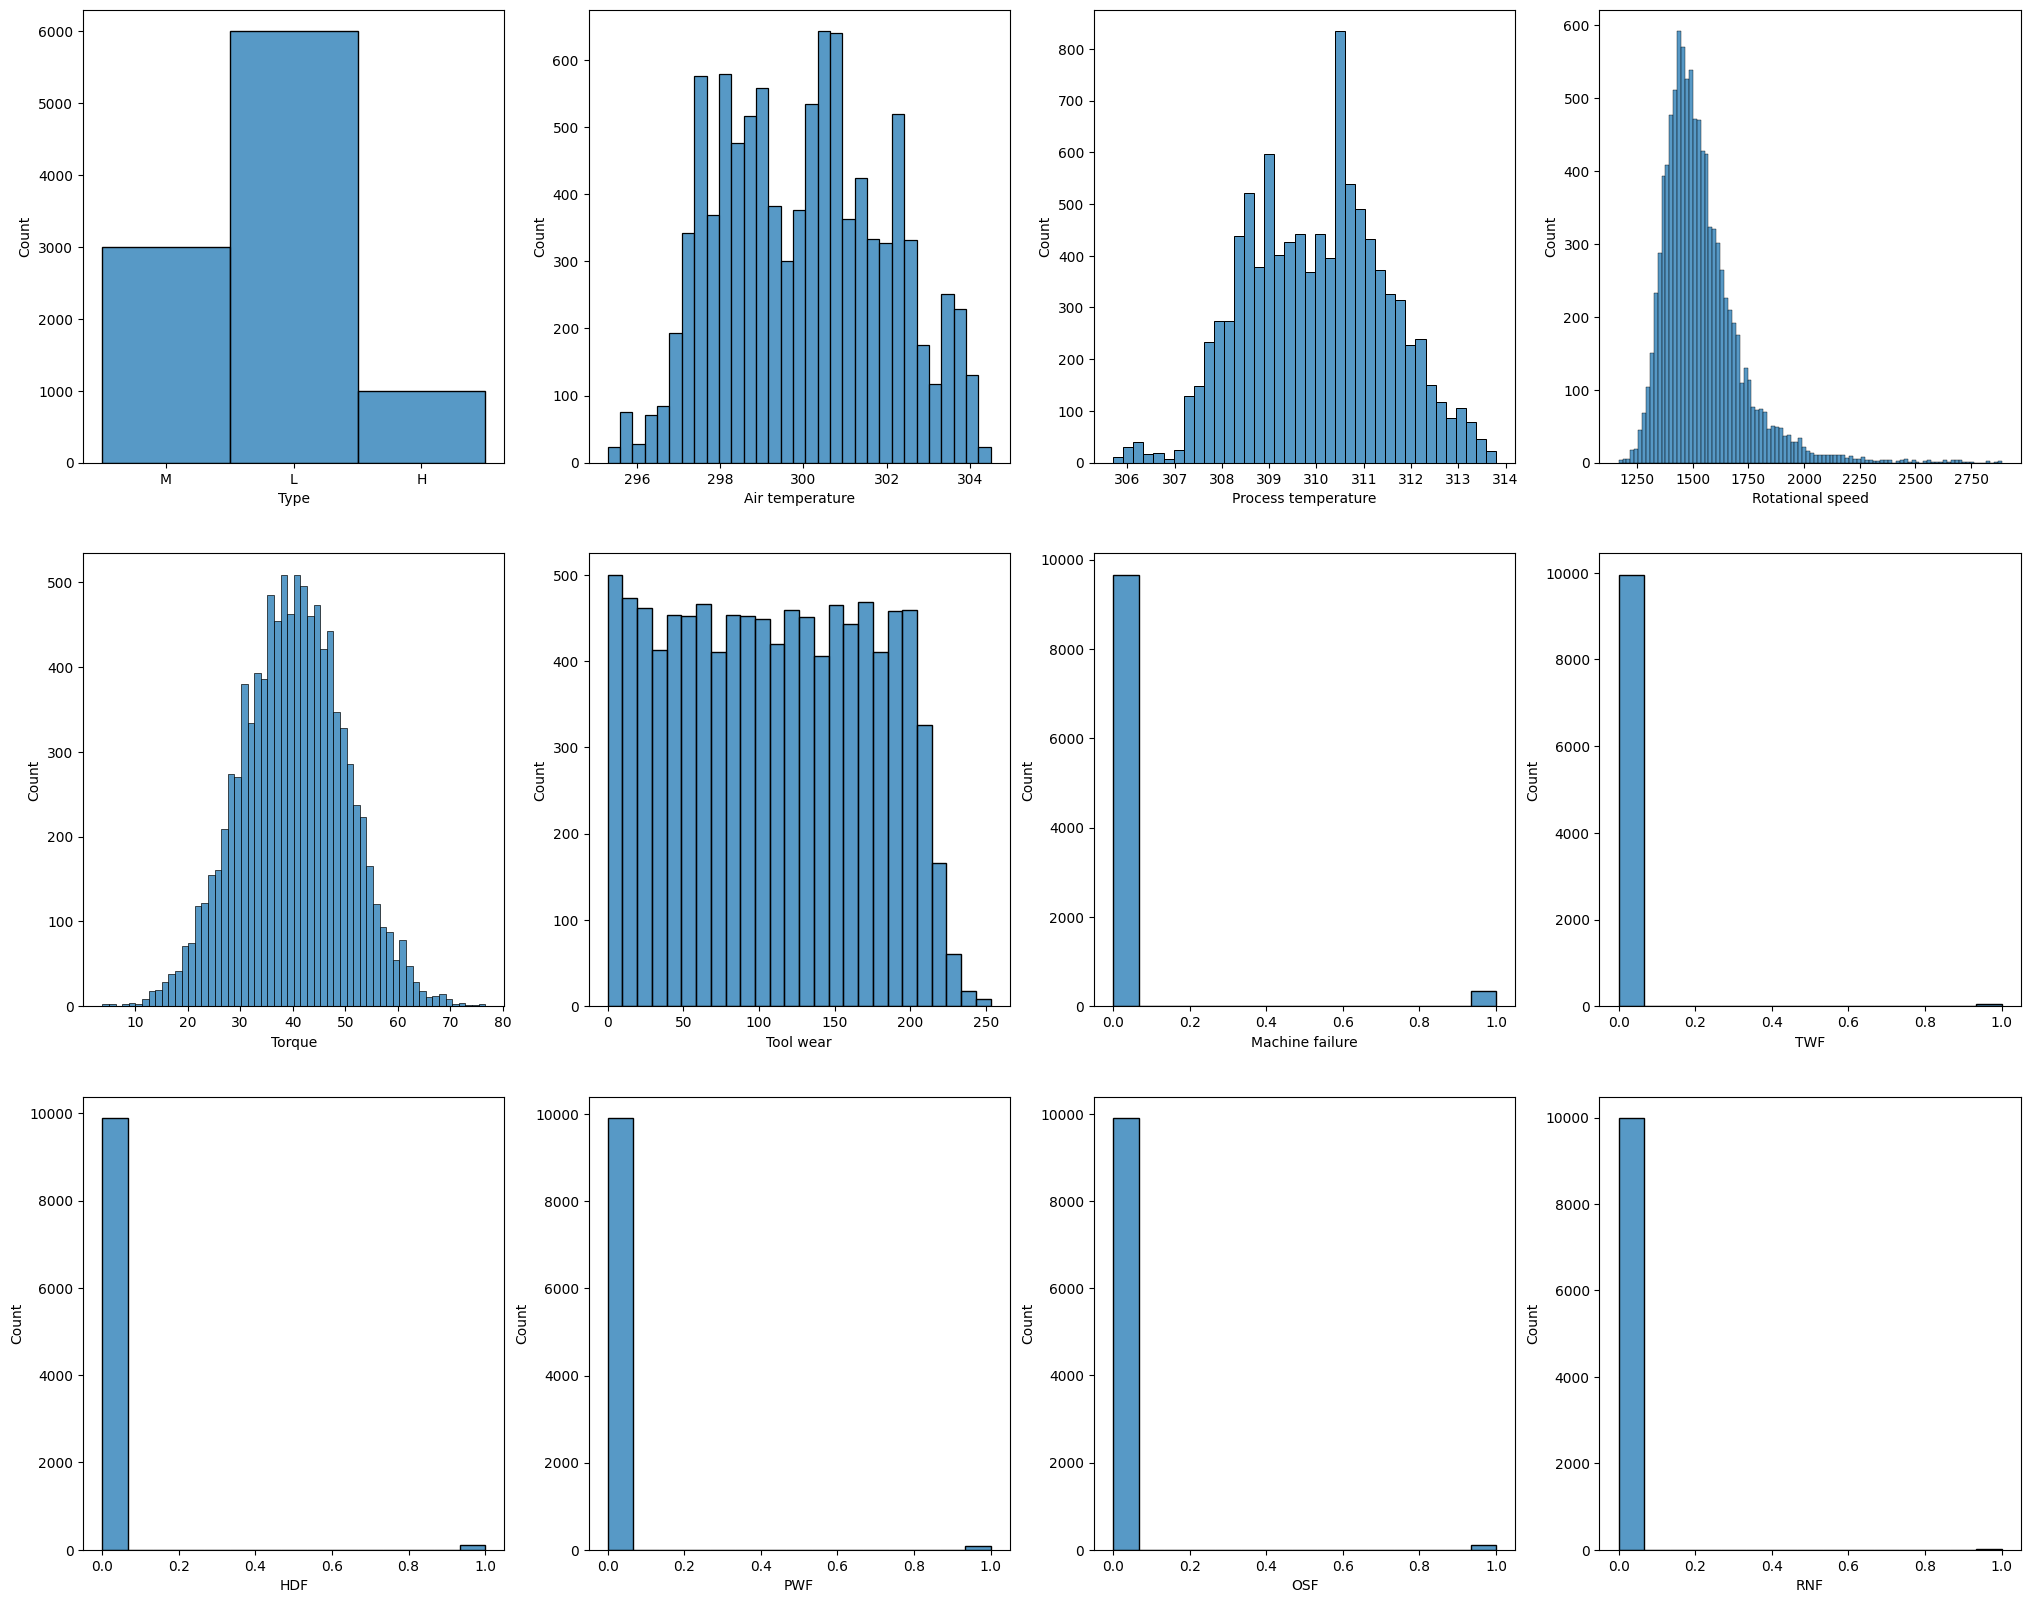

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//4][i%4])

Text(0.5, 1.0, 'Number of failure types per record')

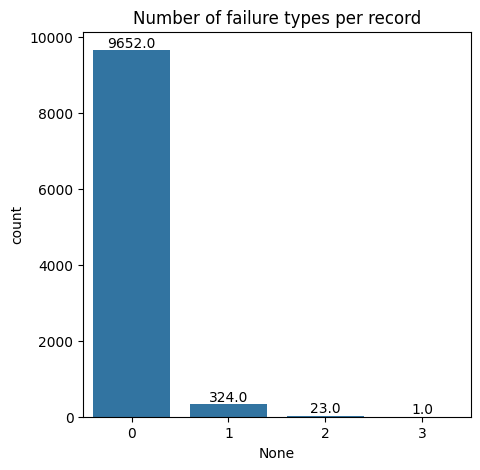

In [ ]:
df_failures = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

As shown above, 24 records contain more than one type of failure, but their count is very small compared to the entire data set, so we will combine the failure types into one feature. The individual failure types are then dropped.

> No failure = 0, TWF = HDF = PWF = OSF = RNF = 1


In [ ]:
df['Machine failure'] = 0

df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 1
df.loc[df['PWF'] == 1, 'Machine failure'] = 1
df.loc[df['OSF'] == 1, 'Machine failure'] = 1
df.loc[df['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

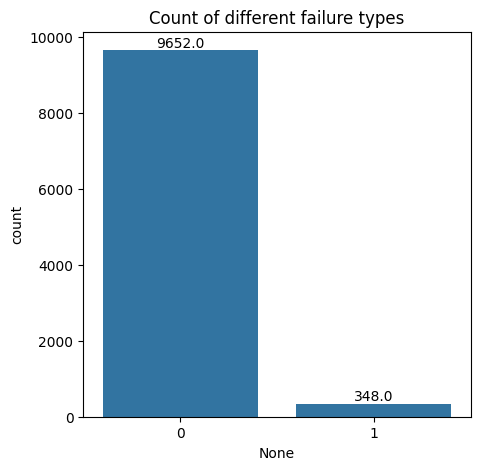

In [ ]:
failure_types = df.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

We can derive a new attribute using this formula:

$Power = Torque \times Rotational \ speed$

In [ ]:
df['Power'] = df[['Rotational speed', 'Torque']].product(axis=1)

<Axes: xlabel='Power', ylabel='Count'>

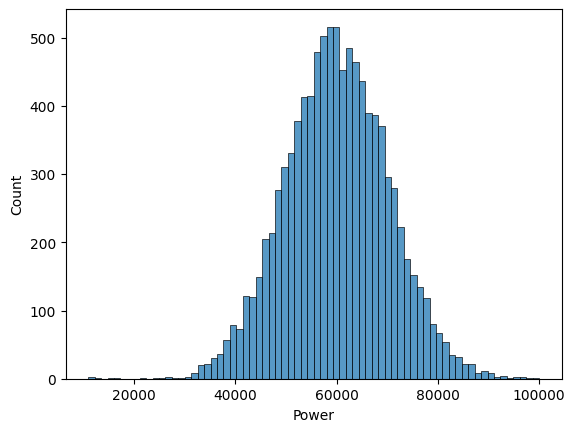

In [ ]:
# Plot the histogram of Power attribute
sns.histplot(df['Power'])

Data type conversion

In [ ]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
df['Type'].replace('L', 0, inplace=True)
df['Type'].replace('M', 1, inplace=True)
df['Type'].replace('H', 2, inplace=True)

In [ ]:
# turn all columns into float for easier processing later
for column in df.columns:
    df[column] = df[column].astype(float)

In [ ]:
# view columns data types
df.dtypes

Type                   float64
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure        float64
Power                  float64
dtype: object

Handling outliers




In [ ]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

Calculate and handle the outliers for each attribute using IQR and Winsorization

In [ ]:
for col in df.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] <= (Q1 - 1.5 * IQR)) | (df[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df.drop(outliers.index, inplace=True)

Density-Based Anomaly Detection (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df)

# identify the outlier rows (those with a negative score) and remove them
outliers = df[scores == -1]
if not outliers.empty:
    df.drop(outliers.index, inplace=True)

In [ ]:
df.shape # after removing the outliers

(9400, 8)

Transformation



In [ ]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

More visualizations

Box and Whisker Plots for each attribute compared with Machine failure (target)

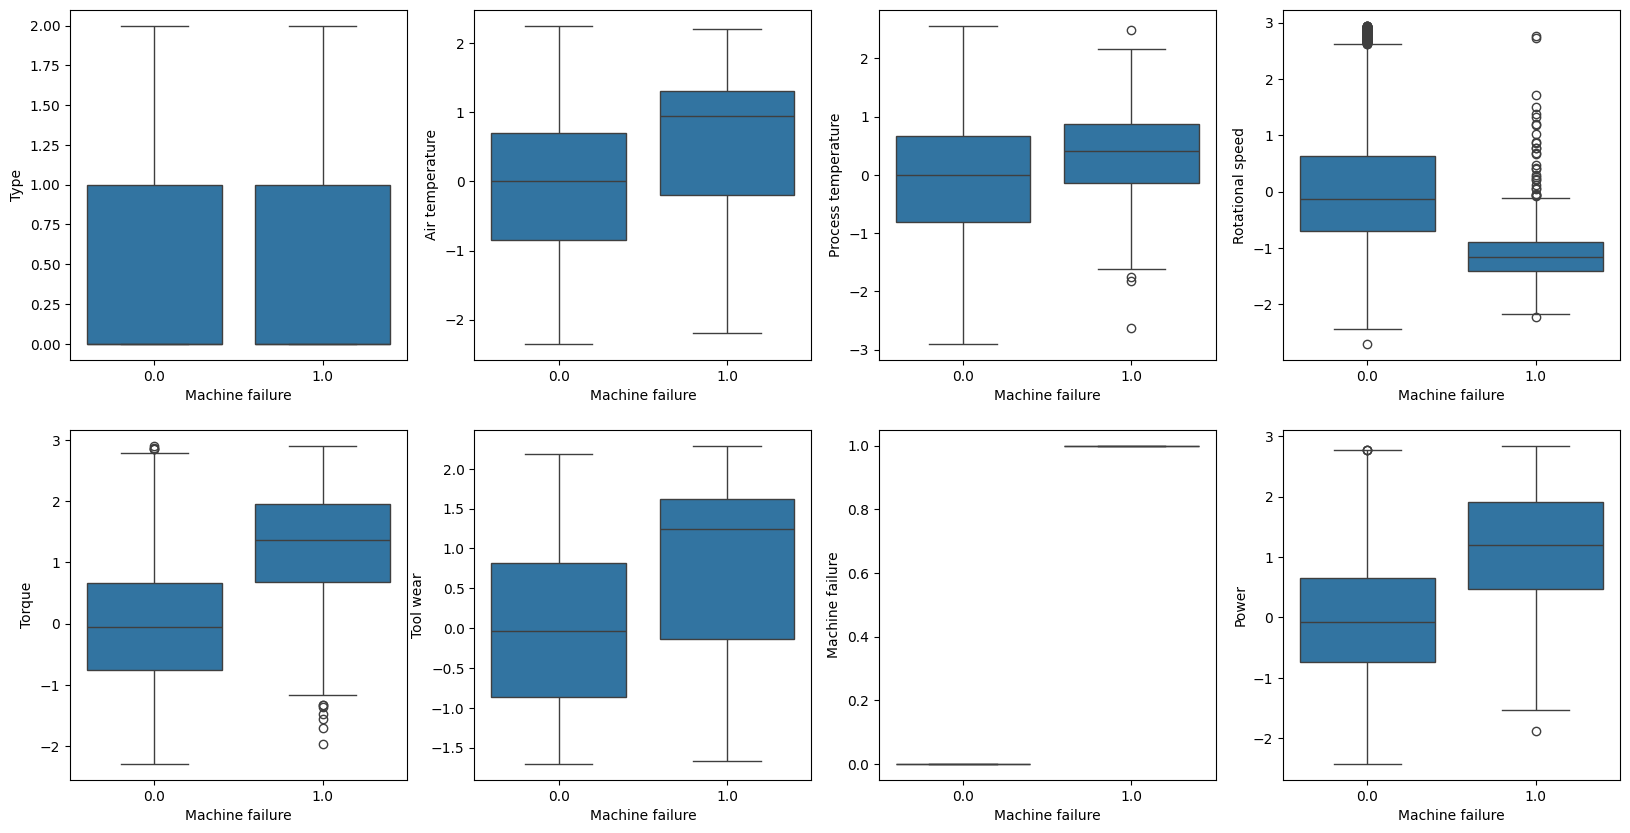

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(df.columns):
    sns.boxplot(x="Machine failure", y=col, data=df, ax=ax[i//4][i%4])

Box and Whisker Plots for each attribute

<Axes: title={'center': 'Box and Whisker Plots'}, ylabel='Value'>

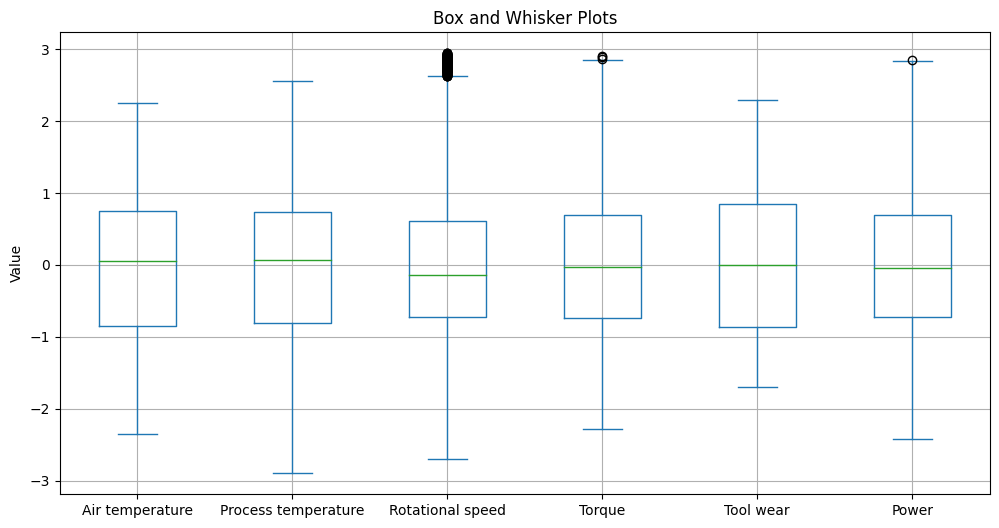

In [ ]:
plot_columns = [col for col in df.columns if col not in excluded_columns]
df[plot_columns].plot(kind='box', figsize=(12, 6), title='Box and Whisker Plots', ylabel='Value', grid=True)

Finding the correlation between the attributes with threshold = 0.3


<Axes: >

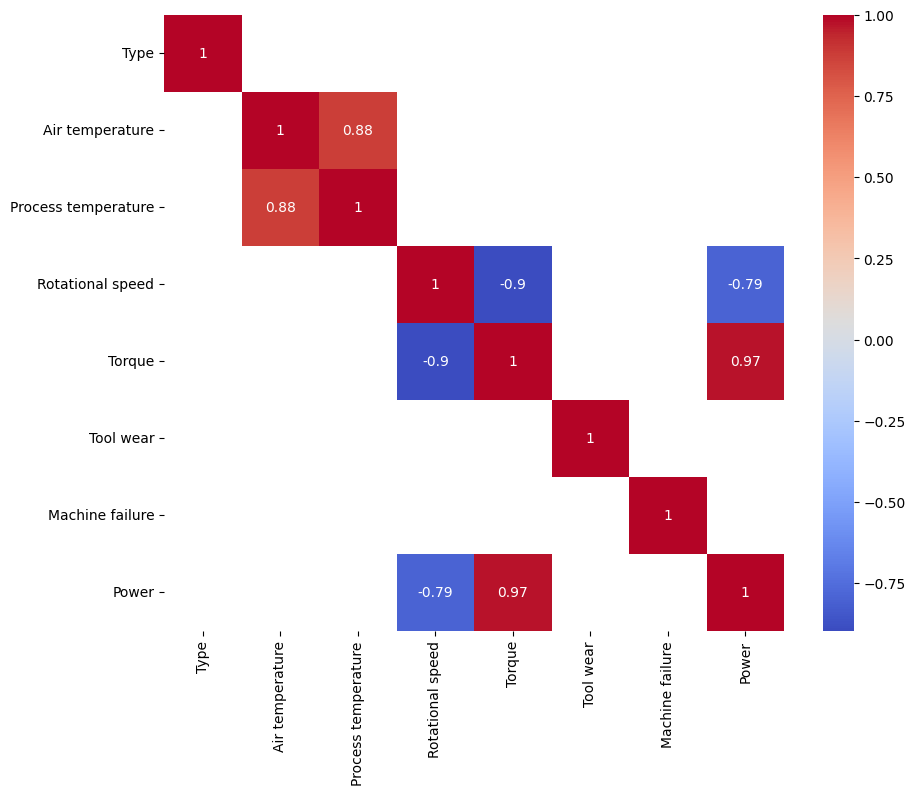

In [ ]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, mask=matrix)

A scatter plot matrix to display the relationships between attributes in the dataset

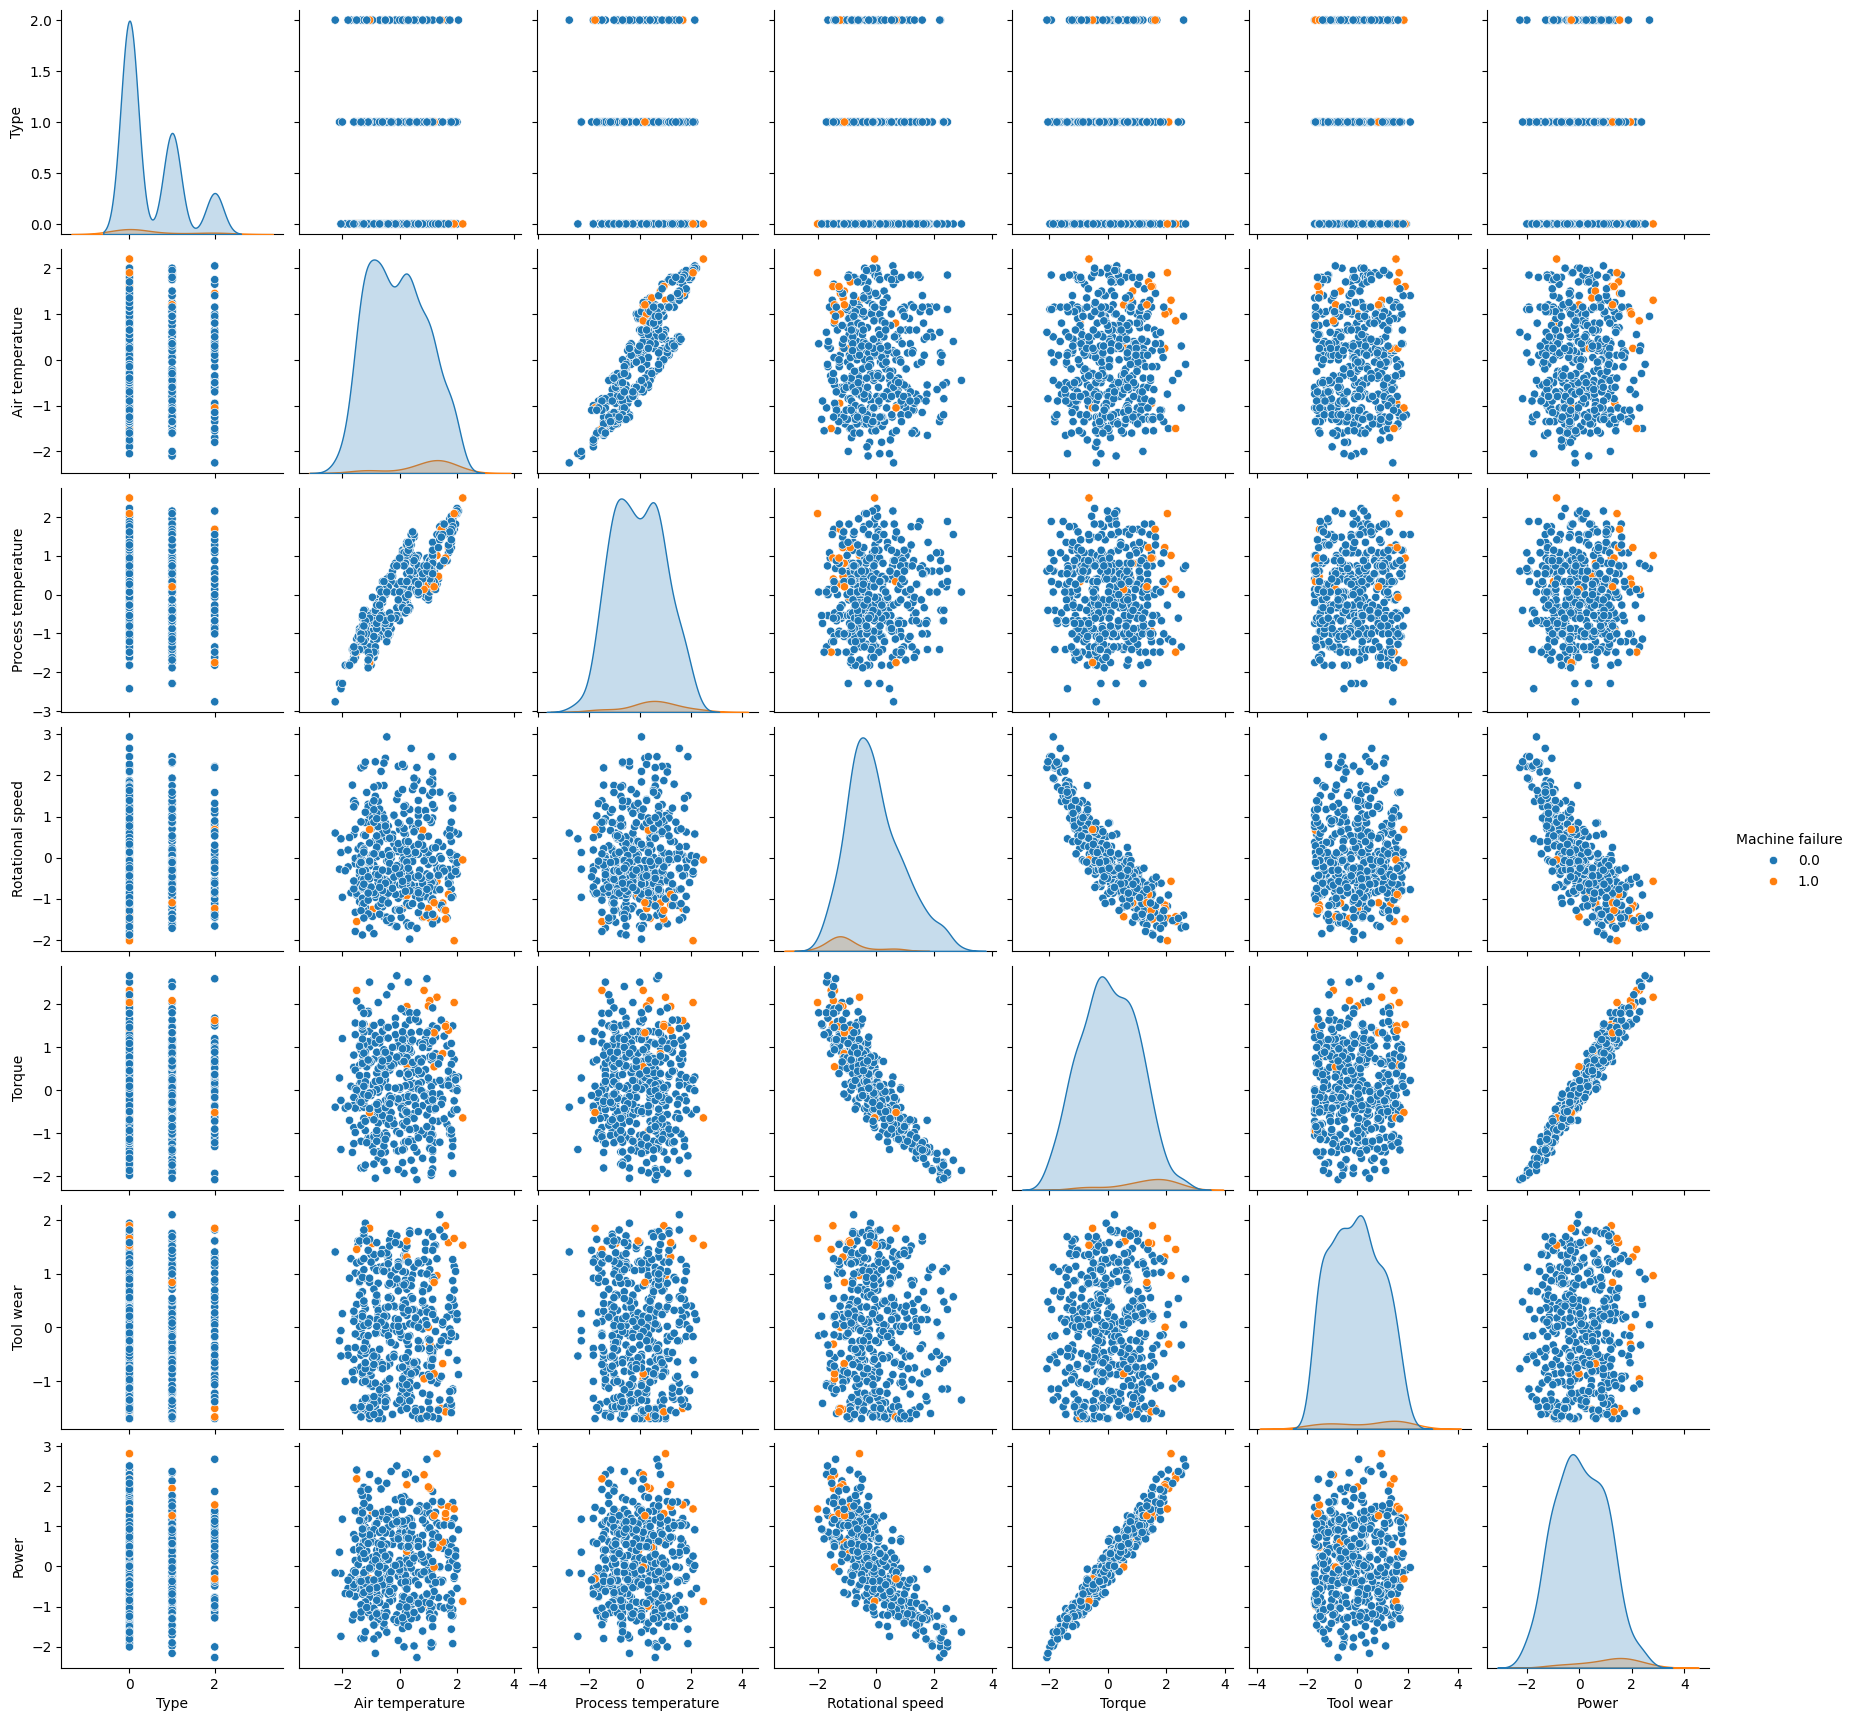

In [ ]:
sns.pairplot(df.sample(frac=0.05), hue='Machine failure')

Parallel coordinate plot (multi-dimensional view)

<Axes: >

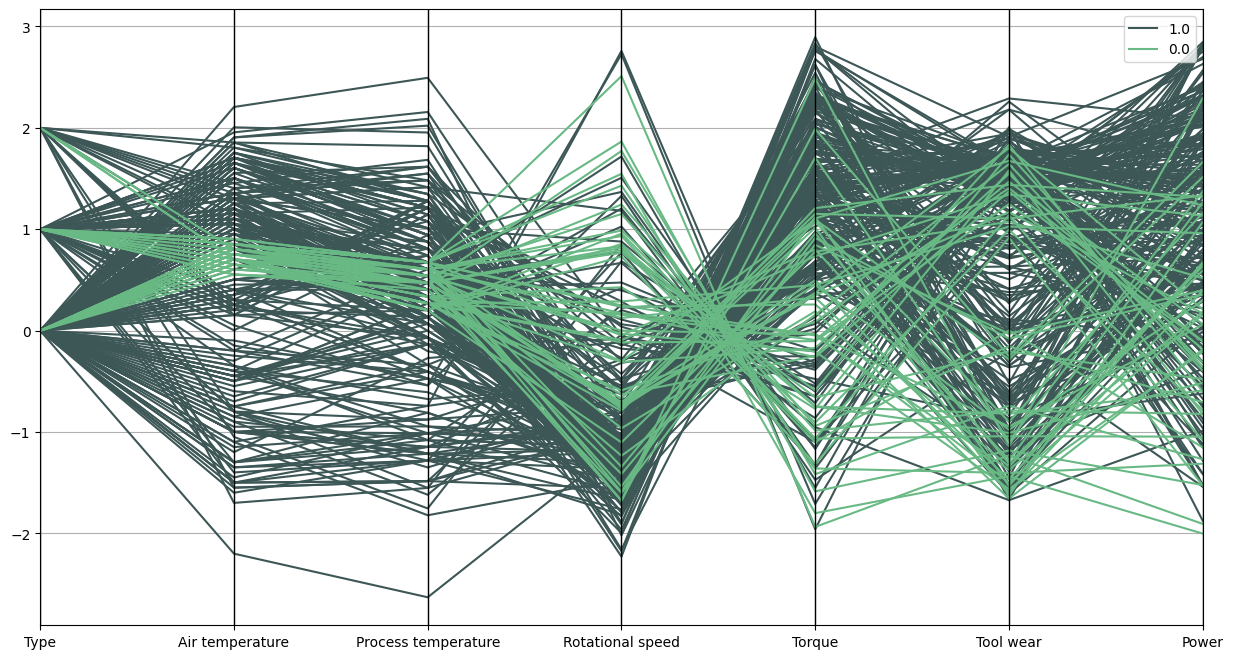

In [ ]:
sample = df.sort_values(by=['Machine failure'], ascending=False).head(300)

plt.figure(figsize=(15,8))
pd.plotting.parallel_coordinates(sample, 'Machine failure', color=('#3D5656', '#68B984', '#FED049'))

Generate a profile report that includes (outliers, missing values, distributions, etc.) using [pandas-profiling](https://pandas-profiling.ydata.ai/docs/master/index.html)

In [ ]:
df_profile = pdpf.ProfileReport(df, dark_mode=True)
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data splitting and sampling

In [ ]:
X = df[["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"]]

In [ ]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure', 'Power'],
      dtype='object')

Split the dataset (70% train : 30% test)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["Machine failure"], axis=1)
y = df["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = y)

Because the data is imbalanced, we oversample the training set

In [ ]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state=42

X_train, y_train = oversample.fit_resample(X_train, y_train)

Training set after oversampling

(array([6406.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

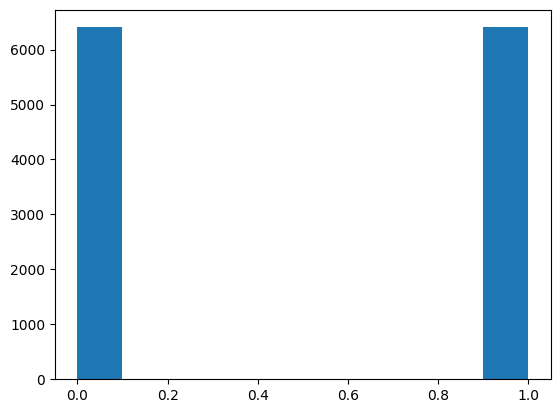

In [ ]:
plt.hist(y_train)

## **Decision Tree Model**

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Accuracy: 0.974113475177305, Precision: 0.9773793371101008, Recall: 0.974113475177305, F1 Score: 0.9755411282469058
Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.64      0.56        74

    accuracy                           0.97      2820
   macro avg       0.75      0.81      0.77      2820
weighted avg       0.98      0.97      0.98      2820



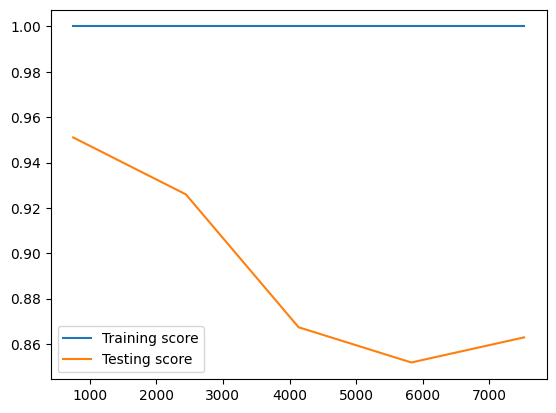

In [ ]:
# Hyperparameter Tuning for Decision Tree
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the parameter grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Retrieve the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree:", best_params_dt)

# Build the model with the best parameters
best_dt = DecisionTreeClassifier(**best_params_dt).fit(X_train, y_train)
end_train = time.time()

# Make predictions
y_predictions = best_dt.predict(X_test)
end_predict = time.time()

def log_scores(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


# Evaluate the model
log_scores("Decision Tree", y_test, y_predictions)
print("Decision Tree\n" + classification_report(y_test, y_predictions))

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_dt, X, y, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree - Accuracy: 0.9738, Precision: 0.9772, Recall: 0.9738, F1 Score: 0.9753
Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.50      0.64      0.56        74

    accuracy                           0.97      2820
   macro avg       0.75      0.81      0.77      2820
weighted avg       0.98      0.97      0.98      2820



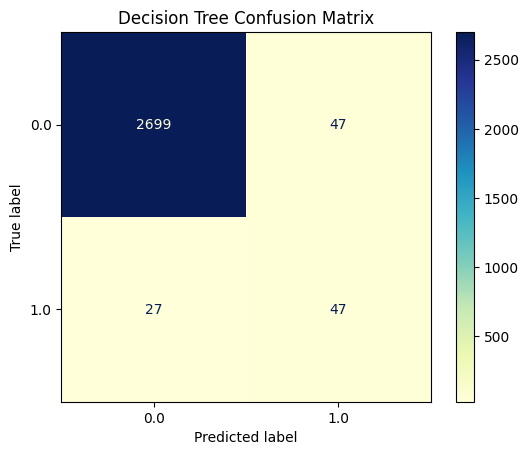

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import PowerTransformer

# Transform features to Gaussian distribution
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=3, scoring='accuracy')
start = time.time()
grid_search_dt.fit(X_train_transformed, y_train)
end_train = time.time()

# Retrieve the best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_
print("Best parameters for Decision Tree:", best_params_dt)

# Build the Decision Tree model with the best parameters
best_dt = DecisionTreeClassifier(**best_params_dt, random_state=0).fit(X_train_transformed, y_train)
y_predictions_dt = best_dt.predict(X_test_transformed)

# Evaluate the Decision Tree model
def log_scores(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

log_scores("Decision Tree", y_test, y_predictions_dt)
print("Decision Tree Model\n" + classification_report(y_test, y_predictions_dt))

# Plot the confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions_dt, cmap=plt.cm.YlGnBu)
plt.title('Decision Tree Confusion Matrix')
plt.show()


Confusion matrix of Decision Tree model

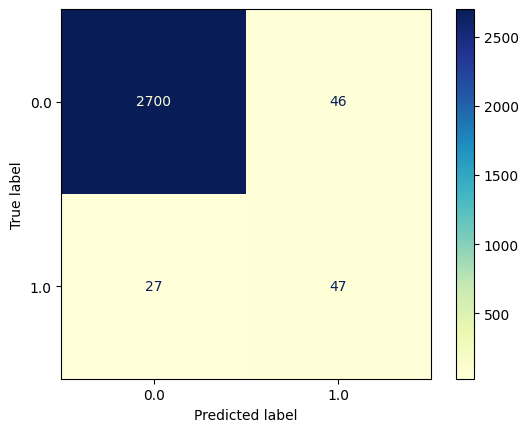

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **Random Forest Model**

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Accuracy: 0.9791, Precision: 0.9792, Recall: 0.9791, F1 Score: 0.9791
Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.60      0.61      0.60        74

    accuracy                           0.98      2820
   macro avg       0.79      0.80      0.80      2820
weighted avg       0.98      0.98      0.98      2820



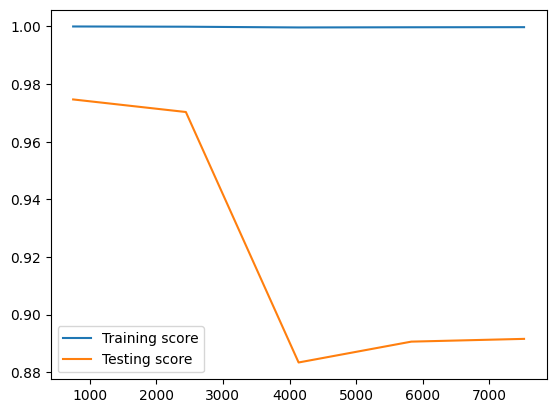

In [ ]:
# Import necessary libraries
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini']
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap=True), param_grid_rf, cv=5, scoring='accuracy')
start = time.time()
grid_search_rf.fit(X_train, y_train)
end_train = time.time()

# Retrieve the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Build the Random Forest model with the best parameters
best_rf = RandomForestClassifier(**best_params_rf, n_jobs=-1, random_state=0, bootstrap=True).fit(X_train, y_train)
y_predictions = best_rf.predict(X_test)
end_predict = time.time()

# Evaluate the model
def log_scores(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

log_scores("Random Forest", y_test, y_predictions)

# Model evaluation for each Machine failure class
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()


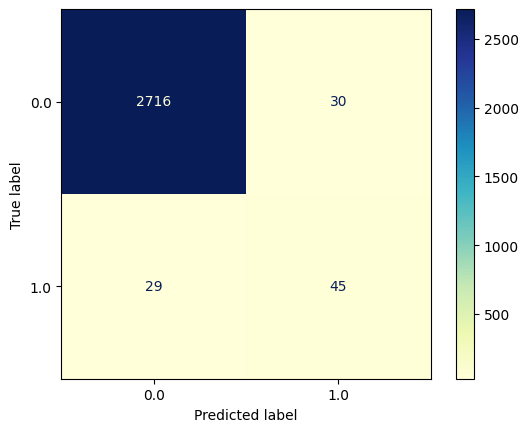

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## **XG Boost Model**

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
XGBoost - Accuracy: 0.9770, Precision: 0.9796, Recall: 0.9770, F1 Score: 0.9781
XGBoost Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.55      0.68      0.61        74

    accuracy                           0.98      2820
   macro avg       0.77      0.83      0.80      2820
weighted avg       0.98      0.98      0.98      2820



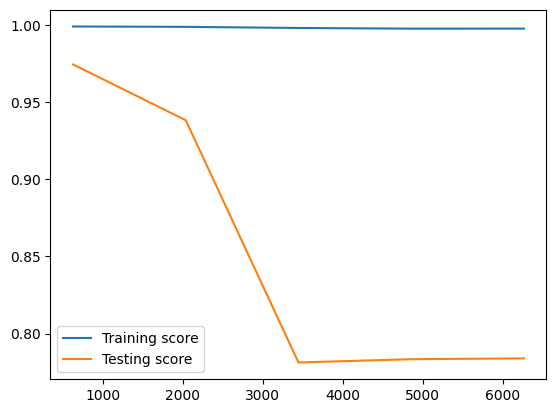

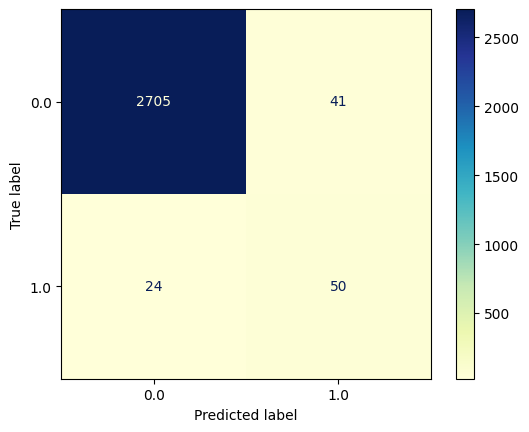

In [ ]:
# Import necessary libraries
import time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, learning_curve

# Define the reduced parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=0), param_grid_xgb, cv=3, scoring='accuracy')  # Reduced CV folds
start = time.time()
grid_search_xgb.fit(X_train, y_train)
end_train = time.time()

# Retrieve the best parameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)

# Build the XGBoost model with the best parameters
best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=0).fit(X_train, y_train)
y_predictions_xgb = best_xgb.predict(X_test)
end_predict = time.time()

# Evaluate the XGBoost model
def log_scores(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

log_scores("XGBoost", y_test, y_predictions_xgb)
print("XGBoost Model\n" + classification_report(y_test, y_predictions_xgb))

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(best_xgb, X, y, cv=3)  # Reduced CV folds

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions_xgb, cmap=plt.cm.YlGnBu)


In [ ]:
from sklearn.preprocessing import PowerTransformer


In [ ]:
# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the training features
X_train_transformed = pt.fit_transform(X_train)

# Transform the test features
X_test_transformed = pt.transform(X_test)


In [ ]:
# Re-train and evaluate the models using transformed features
# Random Forest Model with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0, bootstrap=True), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_transformed, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)
best_rf = RandomForestClassifier(**best_params_rf, n_jobs=-1, random_state=0, bootstrap=True).fit(X_train_transformed, y_train)
y_predictions_rf = best_rf.predict(X_test_transformed)
log_scores("Random Forest", y_test, y_predictions_rf)
print("Random Forest Model\n" + classification_report(y_test, y_predictions_rf))

# XGBoost Model with Hyperparameter Tuning
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=0), param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train_transformed, y_train)
best_params_xgb = grid_search_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)
best_xgb = XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=0).fit(X_train_transformed, y_train)
y_predictions_xgb = best_xgb.predict(X_test_transformed)
log_scores("XGBoost", y_test, y_predictions_xgb)
print("XGBoost Model\n" + classification_report(y_test, y_predictions_xgb))


Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Accuracy: 0.9791, Precision: 0.9792, Recall: 0.9791, F1 Score: 0.9791
Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.60      0.61      0.60        74

    accuracy                           0.98      2820
   macro avg       0.79      0.80      0.80      2820
weighted avg       0.98      0.98      0.98      2820

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
XGBoost - Accuracy: 0.9770, Precision: 0.9796, Recall: 0.9770, F1 Score: 0.9781
XGBoost Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.55      0.68      0.61        74

    accuracy                           0.98      2820
   ma

FEATURE IMPORTANCE or VARIABLE IMAPACT

dcision Tree

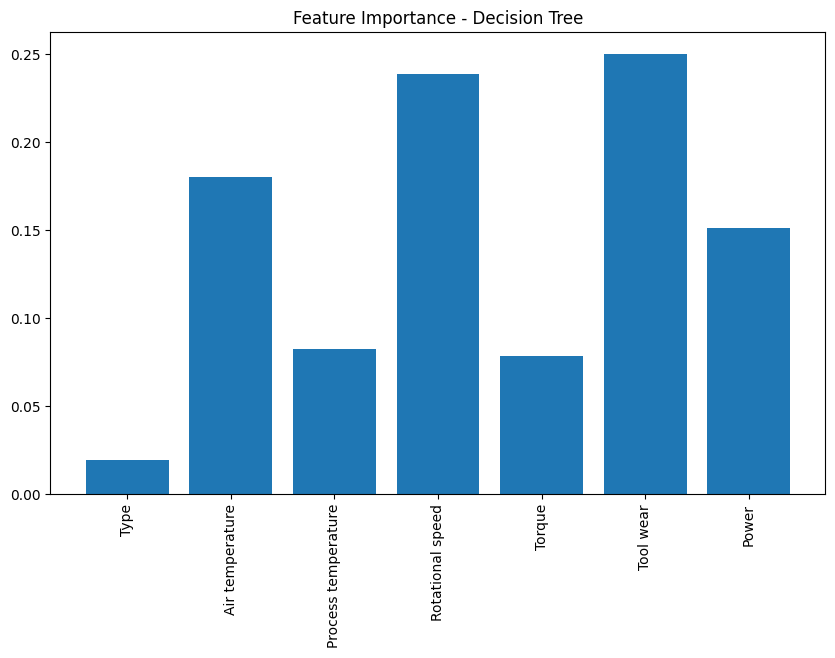

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming data is already loaded and preprocessed as X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model with best hyperparameters
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5, random_state=42)
decision_tree.fit(X_train, y_train)

# Feature importance
importance_dt = decision_tree.feature_importances_

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance_dt)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title('Feature Importance - Decision Tree')
plt.show()


random forest classifier

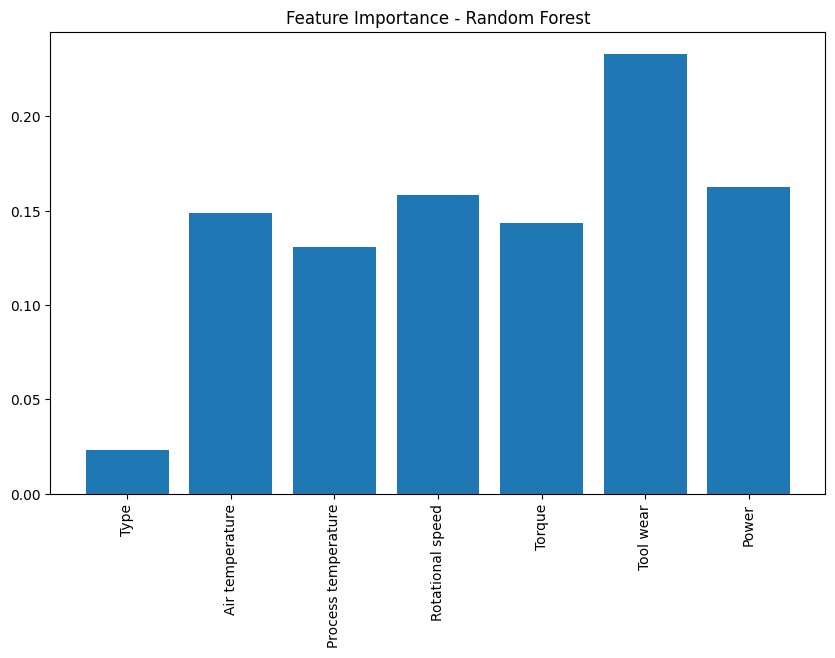

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model with best hyperparameters
random_forest = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, criterion='gini', random_state=42)
random_forest.fit(X_train, y_train)

# Feature importance
importance_rf = random_forest.feature_importances_

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance_rf)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title('Feature Importance - Random Forest')
plt.show()


XGBoost

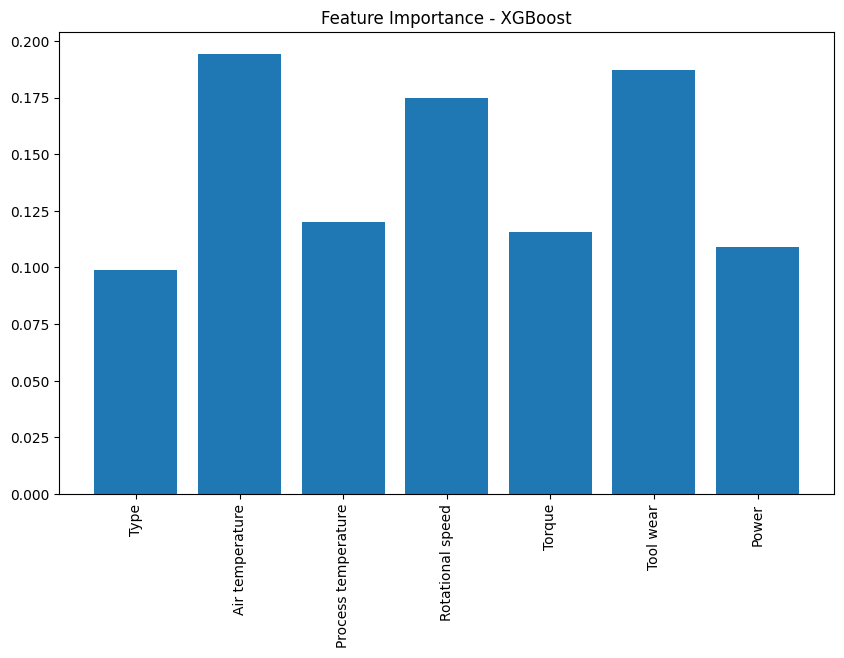

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# Train the XGBoost model with best hyperparameters
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)

# Feature importance
importance_xgb = xgb.feature_importances_

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance_xgb)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title('Feature Importance - XGBoost')
plt.show()


Combined feature importance

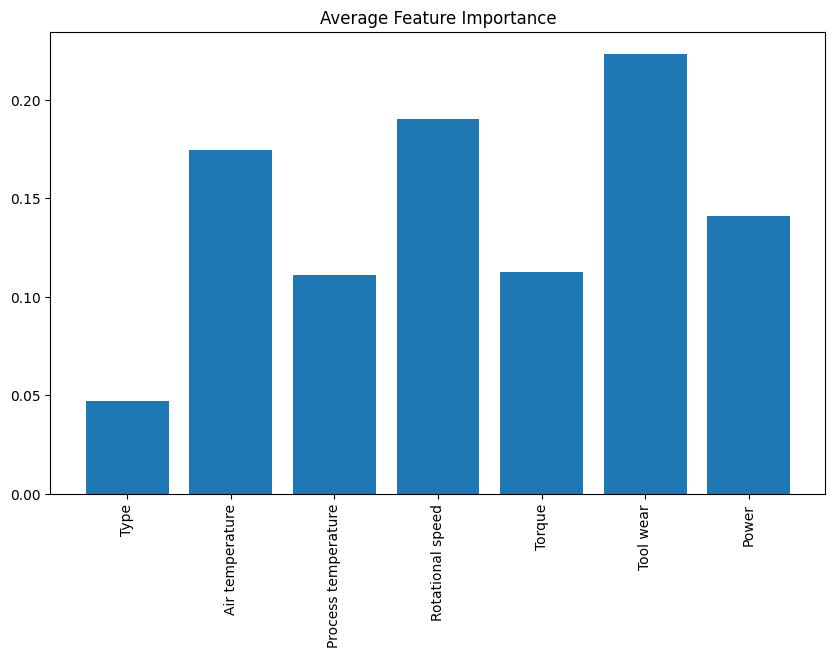

In [ ]:
# Average feature importance
importance_avg = (importance_dt + importance_rf + importance_xgb) / 3

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance_avg)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.title('Average Feature Importance')
plt.show()
